## GRIP : The Sparks Foundation


### Data Science and Business Analytics Intern

### Author : Jainarayan Prajapat

#### Task 6 : Prediction using Decision Tree Algorithm

- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing the required libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Reading the csv file and putting it into 'df' object.

df = pd.read_csv('Iris.csv')

In [3]:
# Checking the top 5 rows of the dataframe

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
# dropping 'ID' 

df=df.drop('Id',axis=1)

In [6]:
# Putting feature variable to X
X = df.drop('Species',axis=1)

# Putting response variable to y
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

### Hyper-parameter tuning

In [9]:
dt = DecisionTreeClassifier(random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3,4, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [12]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [13]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: total: 234 ms
Wall time: 6.52 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [14]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007919,0.007920,0.003908,0.006769,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,10
1,0.008440,0.005482,0.002233,0.003868,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,10
2,0.010936,0.006505,0.000000,0.000000,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.888889,0.807692,0.884615,0.923077,0.876068,0.042197,10
3,0.008730,0.007015,0.002000,0.003464,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,37
4,0.005762,0.006277,0.003914,0.006779,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.333333,0.346154,0.346154,0.346154,0.342949,0.005551,37


In [15]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
40,0.011446,0.004442,0.000278,0.000482,entropy,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
45,0.005467,0.006408,0.003907,0.006767,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
50,0.007823,0.007823,0.005545,0.006407,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
55,0.004020,0.004155,0.007821,0.007821,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.962963,0.807692,0.884615,0.961538,0.904202,0.064106,1
5,0.007825,0.007825,0.003911,0.006773,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1.000000,0.807692,0.884615,0.923077,0.903846,0.069338,5


In [16]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=42)

In [17]:
dt_best = grid_search.best_estimator_

In [18]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [19]:
evaluate_model(dt_best)

Train Accuracy : 0.9619047619047619
Train Confusion Matrix:
[[31  0  0]
 [ 0 36  1]
 [ 0  3 34]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, dt_best.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [22]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Iris-setosa', "Iris-versicolor","Iris-virginica"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [23]:
# Importing required packages for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

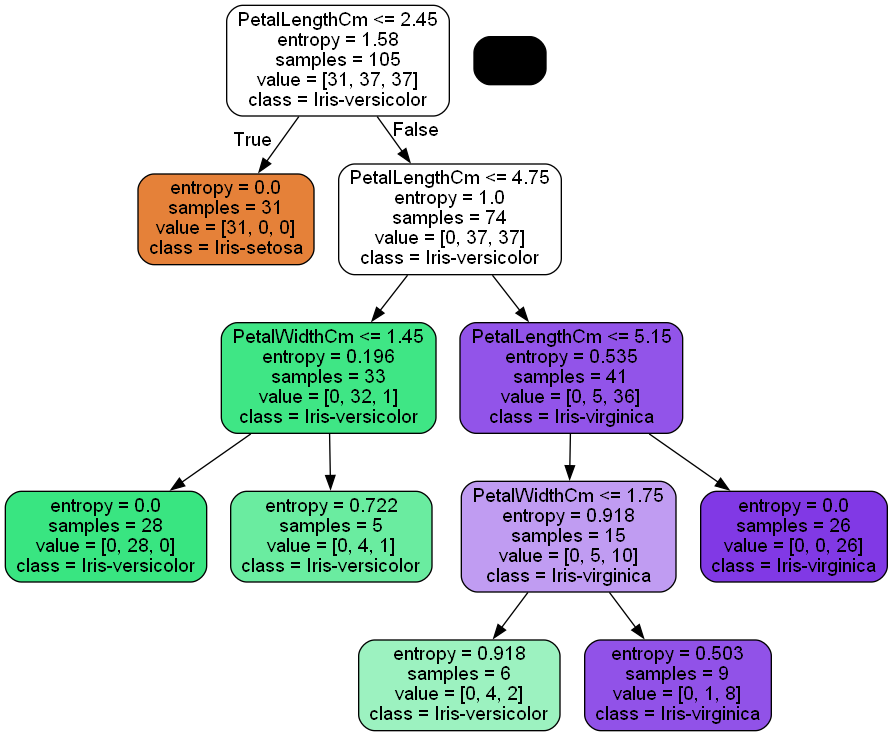

In [24]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**

## Thank You !